# Finding Points for Fixed Districts

The goal of this notebook is to itdentify the tracts to fix the initial district points for LLoyd's algorithm. THis is important to solve the contiguity issues that therandom sampling is producing.  

I will initially load the data into a pandas dataframe and plot the tract centers.

### Loading the data

In [118]:
import pandas as pd
import numpy as np
from dbfread import DBF
import math

td = pd.DataFrame(DBF('TigerData/tl_2017_39_tract.dbf'))

In [119]:
td['INTPTLAT'] = pd.to_numeric(td['INTPTLAT'])
td['INTPTLON'] = pd.to_numeric(td['INTPTLON'])

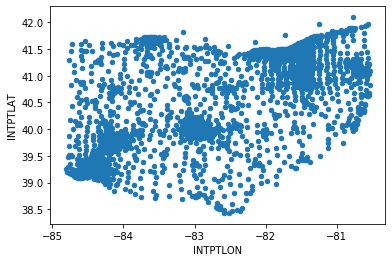

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

td.plot(kind = "scatter", x = "INTPTLON", y = "INTPTLAT")

### Identifying optimal initial points

An attempt to create a series based on the distance to (39.130193, -84.807299) which is an ideal distance to the bottom left of the state. This would be an ideal center for the location of district 1.

In [121]:
dist = []
td_copy = td.copy()
for index, values in td.iterrows():
    lat = values['INTPTLAT']
    lon = values['INTPTLON']
    dist.append(math.sqrt((lat - 39.130193) ** 2 + (lon - -84.807299) ** 2))
# td_copy['dist_to_1'] = pd.Series(dist)
# td_sort1 = td_copy.sort_values(by=['dist_to_1'])
# td_sort1

This code will add a new column to the dataframe for the distance to a sepcified district center. This will enable us to sort the dataframe by tract and find the optimal centers. 

We will now instantiate this and do this for all 16 districts. To do this, I will need to pick 16 points. The sixteen points will be...
1. District 0: (39.130193, -84.807299)
2. District 1: (39.221748, -83.839396)
3. District 2: (39.053985, -82.638011)
4. District 3: (39.830291, -84.801117)
5. District 4: (39.830950, -83.457688)
6. District 5: (39.783740, -82.300530)
7. District 6: (39.758408, -80.886663)
8. District 7: (40.541200, -84.760307)
9. District 8: (40.568328, -83.318881)
10. District 9: (40.395195, -82.480275)
11. District 10: (40.599877, -80.591459)
12. District 11: (40.943083, -81.453506)
13. District 12: (41.626222, -84.769915)
14. District 13: (41.422649, -83.023133)
15. District 14: (41.387628, -82.116416)
16. District 15: (41.939574, -80.576262)

These coordinates were selected visually to optimize distances between centers (roughly) and can be viewed in this image below.

![Map](fixed_district_center.png "Map")

Now I will create the dataframe with the distances to each center.

In [122]:
# Creating the latitude and longitude arrays
lat = [
    39.130193, 39.221748, 39.053985, 39.830291,
    39.830950, 39.783740, 39.758408, 40.541200,
    40.568328, 40.395195, 40.599877, 40.943083,
    41.626222, 41.422649, 41.387628, 41.939574
]

lon = [
    -84.807299, -83.839396, -82.638011, -84.801117,
    -83.457688, -82.300530, -80.886663, -84.760307, 
    -83.318881, -82.480275, -80.591459, -81.453506,
    -84.769915, -83.023133, -82.116416, -80.576262    
]

In [123]:
# Make sure these line up
lat_lon = pd.DataFrame({'lat' : lat, 'lon' : lon})

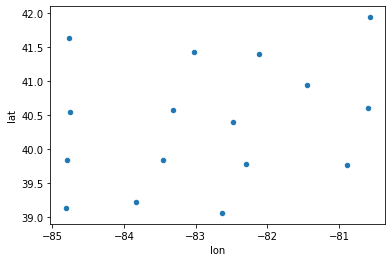

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt

lat_lon.plot(kind = "scatter", x = "lon", y = "lat")

The plot of the latitude and longitude look like the png file above. Now I will run the algorithm that will combine all of this into a dataframe.

In [129]:
td_dist = td.copy()

dist = []
lat = 0
lon = 0
for i in range(0,16):
    dist = []
    for index, values in td.iterrows():
        coords = lat_lon.iloc[i]
        lat_dist = coords['lat']
        lon_dist = coords['lon']
        lat = values['INTPTLAT']
        lon = values['INTPTLON']
        dist.append(math.sqrt((lat - lat_dist) ** 2 + (lon - lon_dist) ** 2))
    td_dist['dist_to_' + str(i)] = pd.Series(dist)

Now we have a dataframe with the distances. I will now create a dictionary with the latitude and longitudes closest to that center and write that to a csv.

In [145]:
centers = {}

for i in range(0,16):
    distance = td_dist.sort_values(by = ['dist_to_' + str(i)])
    centers[str(i)] = [distance.iloc[0]['INTPTLAT'], distance.iloc[0]['INTPTLON']]

pd.DataFrame.from_dict(centers, orient = 'index', columns = ['lat', 'lon']).to_csv('optimized_initial_centers.csv')